In [ ]:
import cv2
import os

def facecrop(image):
    cascade = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")
    #eye = cv2.CascadeClassifier("haarcascade_eye.xml")
    
    img = cv2.imread(image)

    minisize = (img.shape[1],img.shape[0])
    miniframe = cv2.resize(img, minisize)

    faces = cascade.detectMultiScale(miniframe)

    for f in faces:
        x, y, w, h = [ v for v in f ]
        cv2.rectangle(img, (x,y), (x+w,y+h), (255,255,255))

        sub_face = img[y:y+h, x:x+w]
        fname, ext = os.path.splitext(image)
        cv2.imwrite(fname+"_cropped_"+ext, sub_face)
        #print(fname)



    return

#path =('E:\\capstone\\hritik roshan\\')
path =('E:\\capstone\\new folder\\')
dirs = os.listdir(path)
for item in dirs:
    facecrop(path+item)

In [25]:
# Pythono3 code to rename multiple 
# files in a directory or folder 

# importing os module 
import os 

# Function to rename multiple files 
def main(): 
	i = 1351
	
	for filename in os.listdir("E:\\capstone\\will smith"): 
		dst = str(i) + ".jpg"
		src ='E:\\capstone\\will smith\\'+ filename 
		dst ='E:\\capstone\\will smith\\'+ dst 
		
		# rename() function will 
		# rename all the files 
		os.rename(src, dst) 
		i += 1

# Driver Code 
if __name__ == '__main__': 
	
	# Calling main() function 
	main() 


In [2]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

In [3]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)       

In [3]:
batch_size = 20

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'E:\\capstone\\training',  # this is the target directory
        target_size=(224,224),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'E:\\capstone\\valid',
        target_size=(224,224),
        batch_size=batch_size,
        class_mode='categorical')


Found 1200 images belonging to 10 classes.
Found 300 images belonging to 10 classes.


In [36]:
model.fit_generator(
        train_generator,
        steps_per_epoch=1200 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=300 // batch_size)
model.save_weights('first_try.h5')  # always save your weights after training or during training


Epoch 1/50
60/60 [==============================] - 35s 581ms/step - loss: 2.0727 - accuracy: 0.2900 - val_loss: 1.8005 - val_accuracy: 0.3600
Epoch 2/50
60/60 [==============================] - 35s 584ms/step - loss: 1.8662 - accuracy: 0.3558 - val_loss: 1.5477 - val_accuracy: 0.4300
Epoch 3/50
60/60 [==============================] - 35s 579ms/step - loss: 1.7141 - accuracy: 0.4067 - val_loss: 1.4589 - val_accuracy: 0.5233
Epoch 4/50
60/60 [==============================] - 35s 586ms/step - loss: 1.5985 - accuracy: 0.4408 - val_loss: 1.0134 - val_accuracy: 0.5300
Epoch 5/50
60/60 [==============================] - 38s 632ms/step - loss: 1.5397 - accuracy: 0.4667 - val_loss: 1.2350 - val_accuracy: 0.5533
Epoch 6/50
60/60 [==============================] - 35s 580ms/step - loss: 1.4735 - accuracy: 0.4908 - val_loss: 1.2924 - val_accuracy: 0.5500
Epoch 7/50
60/60 [==============================] - 35s 583ms/step - loss: 1.3726 - accuracy: 0.5308 - val_loss: 0.9490 - val_accuracy: 0.6367

In [4]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras_vggface.vggface import VGGFace

# dimensions of our images.
img_width, img_height = 224,224

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = 'E:\\capstone\\training'
validation_data_dir = 'E:\\capstone\\valid'
nb_train_samples = 1200
nb_validation_samples = 300
epochs = 50
batch_size = 10


def save_bottlebeck_features():
    datagen = ImageDataGenerator(rescale=1. / 255)

    # build the VGG16 network
    #model = applications.VGG16(include_top=False, weights='imagenet')
    model =  VGGFace(weights='vggface',include_top=False)

    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_train = model.predict_generator(
        generator, nb_train_samples // batch_size)
    #np.save(open('bottleneck_features_train.npy', 'w'),bottleneck_features_train)
    np.save(open('bottleneck_features_train.npy','wb'),bottleneck_features_train)

    generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_validation = model.predict_generator(
        generator, nb_validation_samples // batch_size)
    #np.save(open('bottleneck_features_validation.npy', 'w'),bottleneck_features_validation)
    np.save(open('bottleneck_features_validation.npy','wb'),bottleneck_features_validation)




save_bottlebeck_features()


Found 1200 images belonging to 10 classes.
Found 300 images belonging to 10 classes.


In [6]:
from keras.layers import  GlobalAveragePooling2D, Dropout, Flatten, Dense, InputLayer
from keras.utils import np_utils
batch_size = 10

train_data = np.load(open('bottleneck_features_train.npy','rb'))
#train_labels = np.array(
#   [0] * (nb_train_samples / 2) + [1] * (nb_train_samples / 2))
train_labels = np.array([0]*120+[1]*120+[2]*120+[3]*120+[4]*120+[5]*120+[6]*120+[7]*120+[8]*120+[9]*120)
train_labels = np_utils.to_categorical(train_labels, 10)

validation_data = np.load(open('bottleneck_features_validation.npy','rb'))
#validation_labels = np.array(
#    [0] * (nb_validation_samples / 2) + [1] * (nb_validation_samples / 2))
validation_labels = np.array([0]*30+[1]*30+[2]*30+[3]*30+[4]*30+[5]*30+[6]*30+[7]*30+[8]*30+[9]*30) 
validation_labels = np_utils.to_categorical(validation_labels, 10)
    
model = Sequential()
model.add(Flatten(input_shape=(7,7,512)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
#model.add(GlobalAveragePooling2D(input_shape=(7,7,512)train_data.shape[1:]))
model.add(Dense(10, activation='softmax'))
    

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

hist = model.fit(train_data, train_labels,epochs=epochs,batch_size=batch_size,validation_data=(validation_data, validation_labels))
model.save_weights(top_model_weights_path)
    

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 6,425,354
Trainable params: 6,425,354
Non-trainable params: 0
_________________________________________________________________
Train on 1200 samples, validate on 300 samples
Epoch 1/50
1200/1200 [==============================] - 10s 9ms/step - loss: 0.4642 - accuracy: 0.8675 - val_loss: 0.0868 - val_accuracy: 0.9867
Epoch 2/50
1200/1200 [============================

In [19]:
score = model.evaluate(train_data,train_labels,verbose=0)
print("Training Acuracy",score[1])

score = model.evaluate(validation_data,validation_labels,verbose=0)
print("Training Acuracy",score[1])

Training Acuracy 1.0
Training Acuracy 0.9900000095367432


<Figure size 432x288 with 0 Axes>

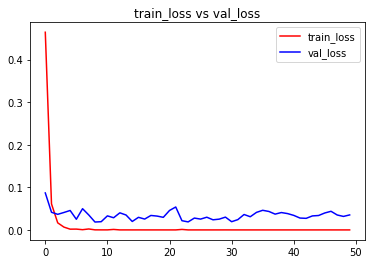

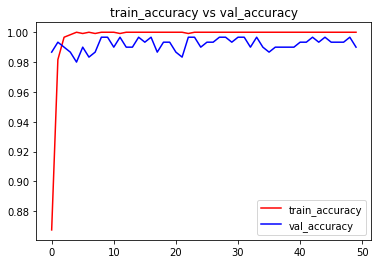

<Figure size 432x288 with 0 Axes>

In [23]:
# visualizing losses and accuracy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_accuracy')
plt.plot(epochs,val_acc,'b', label='val_accuracy')
plt.title('train_accuracy vs val_accuracy')
plt.legend()
plt.figure()

In [38]:
train_labels = np.array([0]*120+[1]*120+[2]*120+[3]*120+[4]*120+[5]*120+[6]*120+[7]*120+[8]*120+[9]*120)    

print(train_labels.shape)

(1200,)
